This code was written by

<h3 style="color: purple; padding: 0px ; margin: 0px">Akwasi Baryeh Mbeleck
Berle</h3>
it's a linear regression performed on advertising dataset


References:</br>

1. https://stackoverflow.com/questions/59140950/scatter-plot-with-multiple-x-features-and-single-y-in-python
   </br>
2. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


Module Imports


In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

## importing dataset


In [20]:
df = pd.read_csv("advertising db.csv", header=0)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Analyzing the Dataset

<text> distext laying the:</br> <text  style="color: yellow">Count</text ></br>
<text  style="color: yellow">mean</text ></br>
<text  style="color: yellow">standard deviation(std)</text ></br>
<text  style="color: yellow">minimum and maximum value</text ></br>
<text  style="color: yellow">25th, 50th and 70th</text > percentile </text>
</br>


In [21]:
df.describe()

,TV,Radio,Newspaper,Sales
count,198.000000,198.000000,198.000000,198.000000
mean,146.400505,23.215657,75.149495,15.072727
std,86.030711,14.882382,629.913498,5.278562
min,0.700000,0.000000,0.300000,1.600000
25%,73.725000,9.925000,12.650000,11.000000
50%,148.500000,22.900000,25.750000,15.950000
75%,218.475000,36.450000,45.100000,18.900000
max,296.400000,49.600000,8888.800000,27.000000


From the below correlation matrix, we can gain some more insight on the
data.</br> example:</br> correlation between
<text style="color: yellow">"TV"</text> and
<text style="color: yellow">"Sales"</text> would give a positive
(<text style="color: green">0.0.900946)</text></br> meaning as on of the values
increases the other value would also increase( a postitive slope)


In [22]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.051352,-0.103668,0.900946
Radio,0.051352,1.000000,-0.022225,0.348308
Newspaper,-0.103668,-0.022225,1.000000,-0.109454
Sales,0.900946,0.348308,-0.109454,1.000000


Checking if there are null values: </br> <text style="color: green">There are no
null values</text>


In [23]:
df.isnull().values.any()

False

from the scatter plot we see that there is one value far out. to the right</br>
this would be our eroneous (high) value


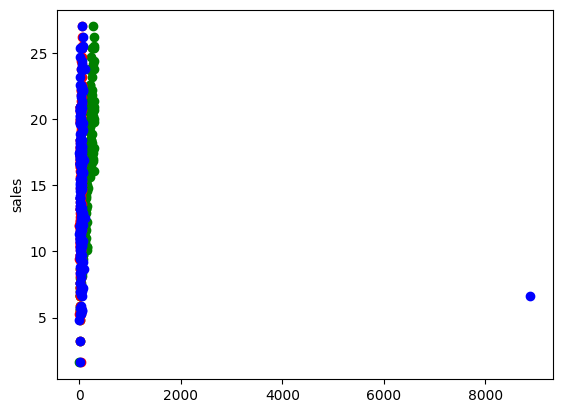

In [24]:
plt.scatter(df.iloc[:, 0], df.iloc[:, -1], color="green")  # TV
plt.scatter(df.iloc[:, 1], df.iloc[:, -1], color="red")  # Radio
plt.scatter(df.iloc[:, 2], df.iloc[:, -1], color="blue")  # Newspaper

plt.ylabel("sales")
plt.show()

##

<h5 style="color: red">Finding and Removing the Eroneous row</h5>


### Finding eroneous (high) value


In [25]:
## Finding and removing the eroneous row from the dataset
for i in range(len(df)):
    if df.at[i, "Newspaper"] >= 200:
        print(i, "\t", df.at[i, "Newspaper"])

117 	 8888.8


### Removing the row with the high value


In [26]:
# removes the row
df.drop(117, axis="index", inplace=True)

# df.reset_index(inplace=True)  # Resets Index
# print(df["Newspaper"].to_string()) # to inspect the column and make sure the row was removed

The correlation matrix changed after removing </br>the row with the eroneous
(high) value </br>notice there is no longer a negative correlation anymore


In [27]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.047996,0.049913,0.899772
Radio,0.047996,1.000000,0.359159,0.346832
Newspaper,0.049913,0.359159,1.000000,0.149597
Sales,0.899772,0.346832,0.149597,1.000000


Graph to show how the different Input values (TV, Radio, Newspaper) affect Sales
after removing eroneous rows


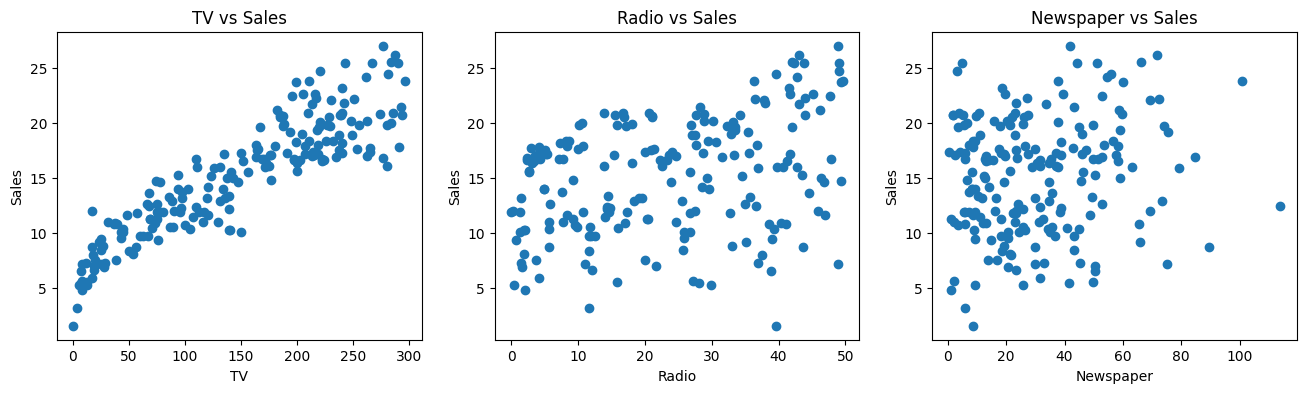

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))

ax[0].scatter(df["TV"], df["Sales"])
ax[1].scatter(df["Radio"], df["Sales"])
ax[2].scatter(df["Newspaper"], df["Sales"])

ax[0].set_title("TV vs Sales")
ax[1].set_title("Radio vs Sales")
ax[2].set_title("Newspaper vs Sales")

for i in range(len(ax)):
    ax[i].set_ylabel("Sales")

ax[0].set_xlabel("TV")
ax[1].set_xlabel("Radio")
ax[2].set_xlabel("Newspaper")

plt.show()

##

initiallizing the X values (inputs)


In [29]:
X = df.iloc[:, :-1]
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
193,38.2,3.7,13.8
194,94.2,4.9,8.1
195,177.0,9.3,6.4
196,283.6,42.0,66.2


##

initiallizing the Y values (output/target)


In [30]:
Y = df.iloc[:, -1]
Y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
193     7.6
194    14.0
195    14.8
196    25.5
197    18.4
Name: Sales, Length: 197, dtype: float64

## Scatter plot for visualization


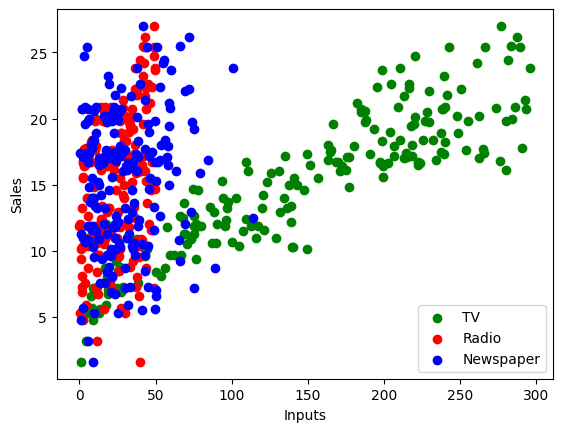

In [31]:
plt.scatter(X.iloc[:, 0], Y, color="green", label="TV")
plt.scatter(X.iloc[:, 1], Y, color="red", label="Radio")
plt.scatter(X.iloc[:, 2], Y, color="blue", label="Newspaper")
plt.legend()

plt.ylabel("Sales")
plt.xlabel("Inputs")
plt.show()

## Splitting dataset


In [32]:
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=11
)

Doing Regression with multiple inputs (multiple linear regression)


In [33]:
lr = LinearRegression()
reg_train = lr.fit(x_train, y_train)

In [34]:
y_predict_train = reg_train.predict(x_train)

### Graph plot on the training target and predicted target


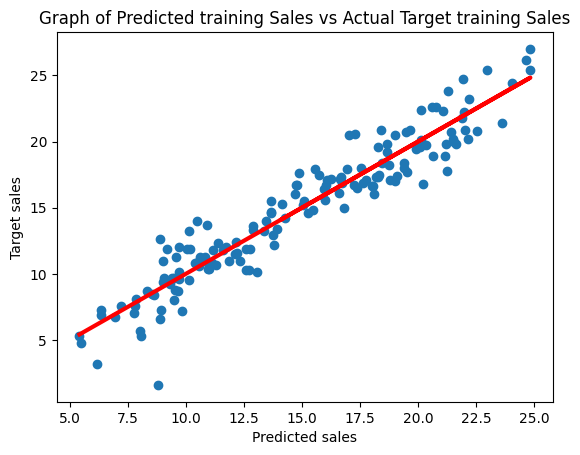

In [35]:
a, b = np.polyfit(y_predict_train, y_train, 1)

plt.scatter(y_predict_train, y_train)
plt.xlabel("Predicted sales")
plt.ylabel("Target sales")

plt.plot(y_predict_train, a * y_predict_train + b, color="red", linewidth=3)
plt.title("Graph of Predicted training Sales vs Actual Target training Sales")

plt.show()

Evaluating the weights and coefficients of the train prediction


In [36]:
m = reg_train.coef_
c = reg_train.intercept_

In [37]:
print("weights: ", m)
print("intercept", c)

weights:  [ 0.05526592  0.10165388 -0.0058312 ]
intercept 4.801321619893102


### evaluating the r2_score and mean squared error for the multiple regression <br> for prediction on training set


In [38]:
print(
    "R2 Score: ",
    r2_score(y_train, y_predict_train),
    "\nMean Squared error: ",
    mean_squared_error(y_predict_train, y_train),
)

R2 Score:  0.9041853397402662 
Mean Squared error:  2.572973200467552


### Making prediction on the test dataset


In [39]:
y_predict_test = lr.predict(x_test)

graph on the test data seems to look similar to the train graph


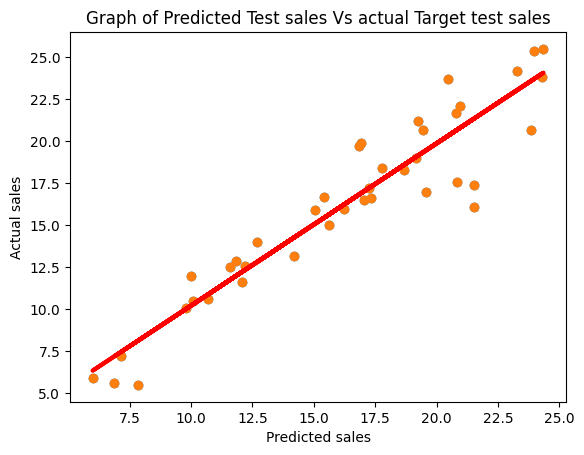

In [40]:
a, b = np.polyfit(y_predict_test, y_test, 1)

plt.scatter(y_predict_test, y_test)
plt.xlabel("Predicted sales")
plt.ylabel("Actual sales")

plt.scatter(y_predict_test, y_test)

plt.title("Graph of Predicted Test sales Vs actual Target test sales")
plt.plot(y_predict_test, a * y_predict_test + b, color="red", linewidth=3)

plt.show()

### Evaluating weights and coefficients of the test prediction


In [41]:
m = lr.coef_
c = lr.intercept_

In [42]:
print("weights:\t", m)
print("intercept:\t", c)

weights:	 [ 0.05526592  0.10165388 -0.0058312 ]
intercept:	 4.801321619893102


## Evaluating the R2 score and the mean squared error of the test prediction


In [43]:
print("R2 Score: ", r2_score(y_test, y_predict_test))
print(
    "Mean Squared error: ",
    mean_squared_error(y_predict_test, y_test),
)

R2 Score:  0.8827729357051606
Mean Squared error:  3.3259479514443884


# <h4> bonus: </br> Here, I attempt single linear regression with the individual input values and the target value (sales)</h4>

graphing the regression line of best fit </br>for the individual train inputs
and the train target (sales)


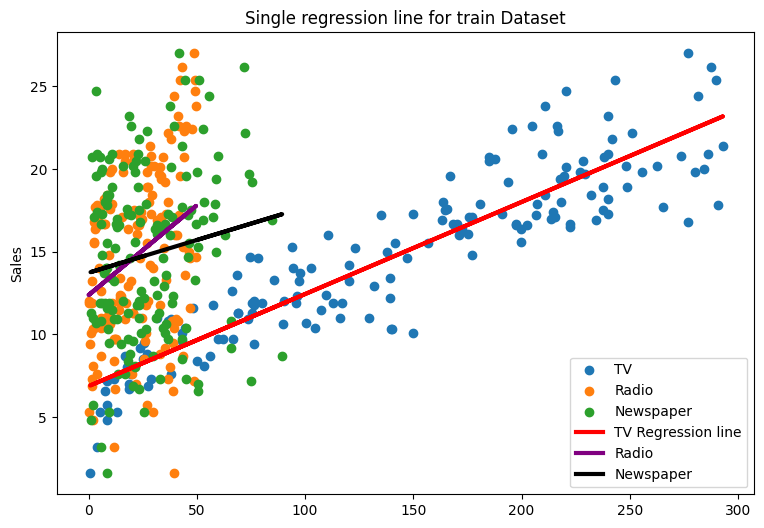

TV: 			Weight = [0.05568425]	intercept = 6.870012257740281
Radio: 		Weight = [0.10865385]	intercept = 12.376087078665032
Newspaper: 	Weight = [0.03960469]	intercept = 13.727626785850898


In [44]:
lr = LinearRegression()
fig, ax = plt.subplots(figsize=(9, 6))


x0 = np.array(x_train["TV"]).reshape(-1, 1)
model_train_x0 = lr.fit(x0, y_train)
y_train_pred_x0 = model_train_x0.predict(x0)
m0 = lr.coef_
c0 = lr.intercept_

x1 = np.array(x_train["Radio"]).reshape(-1, 1)
model_train_x1 = lr.fit(x1, y_train)
y_train_pred_x1 = model_train_x1.predict(x1)
model_train_x1 = lr.fit(x1, y_train)
m1 = lr.coef_
c1 = lr.intercept_

x2 = np.array(x_train["Newspaper"]).reshape(-1, 1)
model_train_x2 = lr.fit(x2, y_train)
y_train_pred_x2 = model_train_x2.predict(x2)
m2 = lr.coef_
c2 = lr.intercept_

ax.set_title("Single regression line for train Dataset")

ax.scatter(x0, y_train, label="TV")
ax.scatter(x1, y_train, label="Radio")
ax.scatter(x2, y_train, label="Newspaper")
ax.plot(x0, y_train_pred_x0, color="red", linewidth=3, label="TV Regression line")
ax.plot(x1, y_train_pred_x1, color="purple", linewidth=3, label="Radio")
ax.plot(x2, y_train_pred_x2, color="black", linewidth=3, label="Newspaper")

legend = plt.legend(loc="best")
plt.ylabel("Sales")
plt.show()


print(
    f"TV: \t\t\tWeight = {m0}\tintercept = {c0}\n\
Radio: \t\tWeight = {m1}\tintercept = {c1}\n\
Newspaper: \tWeight = {m2}\tintercept = {c2}"
)

Graphing single linear regression on test data


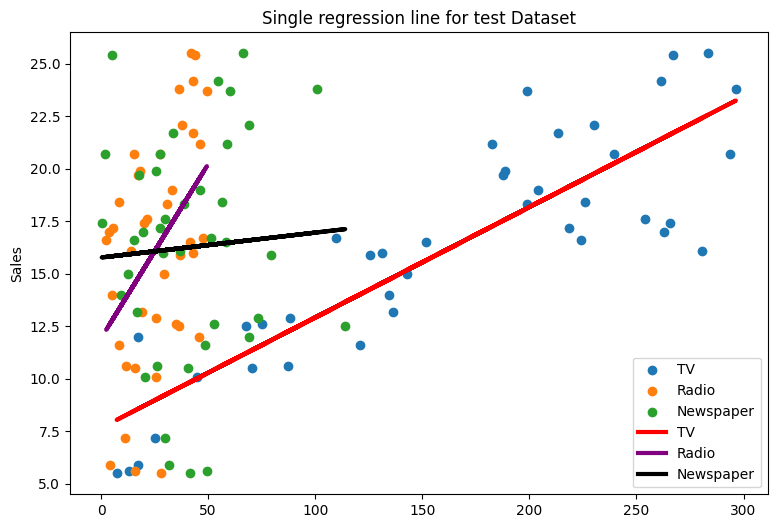

TV: 			Weight = [0.05259596]	intercept = 7.658984573342558
Radio: 		Weight = [0.16577768]	intercept = 11.934873700974325
Newspaper: 	Weight = [0.01186124]	intercept = 15.77432091390983


In [45]:
fig, ax = plt.subplots(figsize=(9, 6))


x0 = np.array(x_test["TV"]).reshape(-1, 1)
model_train_x0 = lr.fit(x0, y_test)
y_test_pred_x0 = model_train_x0.predict(x0)
m0 = lr.coef_
c0 = lr.intercept_


x1 = np.array(x_test["Radio"]).reshape(-1, 1)
model_train_x1 = lr.fit(x1, y_test)
y_test_pred_x1 = model_train_x1.predict(x1)
model_train_x1 = lr.fit(x1, y_test)
m1 = lr.coef_
c1 = lr.intercept_

x2 = np.array(x_test["Newspaper"]).reshape(-1, 1)
model_train_x2 = lr.fit(x2, y_test)
y_test_pred_x2 = model_train_x2.predict(x2)
m2 = lr.coef_
c2 = lr.intercept_

ax.scatter(x0, y_test, label="TV")
ax.scatter(x1, y_test, label="Radio")
ax.scatter(x2, y_test, label="Newspaper")
ax.plot(x0, y_test_pred_x0, color="red", linewidth=3, label="TV")
ax.plot(x1, y_test_pred_x1, color="purple", linewidth=3, label="Radio")
ax.plot(x2, y_test_pred_x2, color="black", linewidth=3, label="Newspaper")

ax.set_title("Single regression line for test Dataset")
legend = plt.legend(loc="best")
plt.ylabel("Sales")
plt.show()

print(
    f"TV: \t\t\tWeight = {m0}\tintercept = {c0}\n\
Radio: \t\tWeight = {m1}\tintercept = {c1}\n\
Newspaper: \tWeight = {m2}\tintercept = {c2}"
)